# Escuela Politécnica Nacional | EDA II - Informe N° 8

## 1. Objetivos

- Analizar el funcionamiento del algoritmo de Dijkstra como método para determinar rutas más cortas en grafos ponderados.

- Comprender la importancia de los algoritmos de búsqueda de rutas en el contexto de estructuras de datos y grafos.

- Visualizar y analizar los resultados del algoritmo.

## 2. Introducción

El algoritmo de Dijkstra, desarrollado por Edsger Dijkstra en 1956, es uno de los métodos más conocidos y utilizados para resolver el problema de encontrar las rutas más cortas en un grafo ponderado. Este algoritmo es de vital importancia en diversas áreas de la computación, como el diseño de redes, los sistemas de navegación y los modelos de optimización.

El presente informe tiene como objetivo principal estudiar el funcionamiento teórico del algoritmo de Dijkstra mediante ejemplos planteados. Para ello, se analizarán los conceptos fundamentales del algoritmo, se implementará una solución en Python para ilustrar su operatividad, y se evaluará su desempeño.

La relevancia del algoritmo radica en su capacidad de calcular eficientemente las rutas más cortas desde un nodo fuente a todos los demás nodos de un grafo, siempre que las ponderaciones de las aristas sean no negativas. Este informe busca no solo explicar el proceso paso a paso del algoritmo, sino también proporcionar una comprensión clara de su aplicabilidad teórica en el estudio de grafos.

Finalmente, el presente informe servirá como una base teórica para el aprendizaje y la implementación del algoritmo, destacando su importancia dentro del ámbito de las estructuras de datos y algoritmos.

## 3. Ejercicios planteados y/o programas implementados

### 1. Implemente el algoritmo de Dijkstra y despliegue la ruta más barata desde S hasta F - Trabaje con el siguiente ejemplo (dé nombres a los nodos):

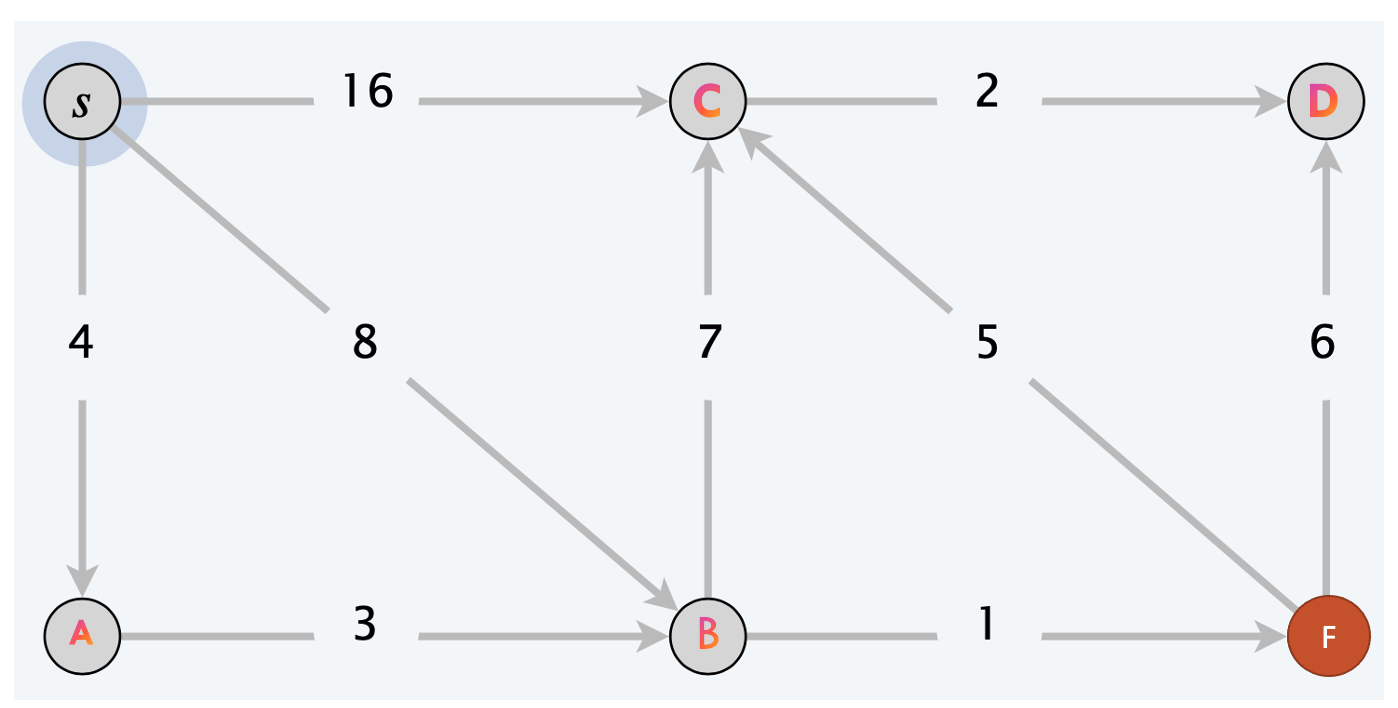

Para la implementación del algoritmo se guarda el grafo planteado en una estructura de tipo diccionario que permita almacenar el grafo con sus respectivas aristas ponderadas.

In [240]:
grafo_1 = {
    "S" : {"A":4, "B":8, "C":16},
    "A" : {"B":3},
    "B" : {"C":7, "F":1},
    "C" : {"D":2},
    "D" : {},
    "F" : {"C":5, "D":6}
}

A continuación, se crean estructuras como costs (almacena los costos de cada nodo) y parents (almacena los padres de cada nodo) que son necesarias para el manejo del grafo a lo largo de la implementación del algoritmo.

In [241]:
costs_1 = {
    "S": float("inf"),
    "A": 4,
    "B": 8,
    "C": 16,
    "D": float("inf"),
    "F": float("inf")
}

parents_1 = {
    "A":"S",
    "B":"S",
    "C":"S",
    "D":None,
    "F":None
}

processed = []

Luego, se define la función *find_lowest_cost_node* que permite hallar el nodo mas barato que aún no haya sido analizado.

In [242]:
def find_lowest_cost_node(costs, processed):
    lowest_cost = float("inf")
    lowest_cost_node = None
    # Go through each node.
    for node in costs:
        cost = costs [node]
        # If it's the lowest cost so far and hasn't been processed yet:
        if cost < lowest_cost and node not in processed:
            # set it as the new lowest-cost node.
            lowest_cost = cost
            lowest_cost_node = node
    return lowest_cost_node

Se crea la función que implementa el algoritmo de dijkstra.

In [243]:
def dijkstra (Grafo, costs, parents, processed):
    node = find_lowest_cost_node(costs, processed)
    while node is not None:
        cost = costs [node]
        neighbors = Grafo [node]
        for n in neighbors.keys ():
            new_cost = cost + neighbors [n]
            if costs [n] > new_cost:
                print ('El costo de {} es más barato desde {} \n con {}'.
                       format(n, node, new_cost))
                costs [n] = new_cost
                parents [n] = node
        processed. append (node)
        print("Nodos procesados: ", processed)
        node = find_lowest_cost_node(costs, processed)
    print("Costos desde el nodo start hasta cada nodo:")
    print("[", end=" ")
    for keys, values in costs.items():
        print("{}: {}".format(keys, values))
    print("]")

Y se define la función que obtiene la ruta mas barata a partir de la lista parents generada.

In [244]:
def obtener_ruta_mas_barata(parents, nodo_objetivo):
    ruta = []
    nodo = nodo_objetivo
    while nodo is not None:  # Recorrer hasta llegar al nodo inicial (que no tiene padre)
        ruta.append(nodo)
        nodo = parents.get(nodo)
    ruta.reverse()  # Invertir la lista para obtener el camino en el orden correcto
    return ruta

Finalmente, se define una función que imprime la ruta obtenida de la función anterior y el costo de dicha ruta.

In [245]:
def ruta(parents, nodo_inicio, nodo_fin, costos):
    path = obtener_ruta_mas_barata(parents, nodo_fin)
    print("La ruta más barata desde {} a {}".
          format(nodo_inicio, nodo_fin), "es:", " -> ".join(path))
    print("El costo total es de ", costos[nodo_fin])

In [246]:
# Llamada a la función que contiene el algoritmo de Dijkstra
dijkstra(grafo_1, costs_1, parents_1, processed)

El costo de B es más barato desde A 
 con 7
Nodos procesados:  ['A']
El costo de C es más barato desde B 
 con 14
El costo de F es más barato desde B 
 con 8
Nodos procesados:  ['A', 'B']
El costo de C es más barato desde F 
 con 13
El costo de D es más barato desde F 
 con 14
Nodos procesados:  ['A', 'B', 'F']
Nodos procesados:  ['A', 'B', 'F', 'C']
Nodos procesados:  ['A', 'B', 'F', 'C', 'D']
Costos desde el nodo start hasta cada nodo:
[ S: inf
A: 4
B: 7
C: 13
D: 14
F: 8
]


In [247]:
# Llamada a la función que imprime la ruta y el costo
inicio = "S" 
fin = "F"
ruta(parents_1, inicio, fin, costs_1)

La ruta más barata desde S a F es: S -> A -> B -> F
El costo total es de  8


### 2. Implemente el algoritmo de Dijkstra y despliegue la ruta más barata desde 5 hasta 6 - Trabaje con el siguiente ejemplo. Los pesos de cada arista están listados a continuación:

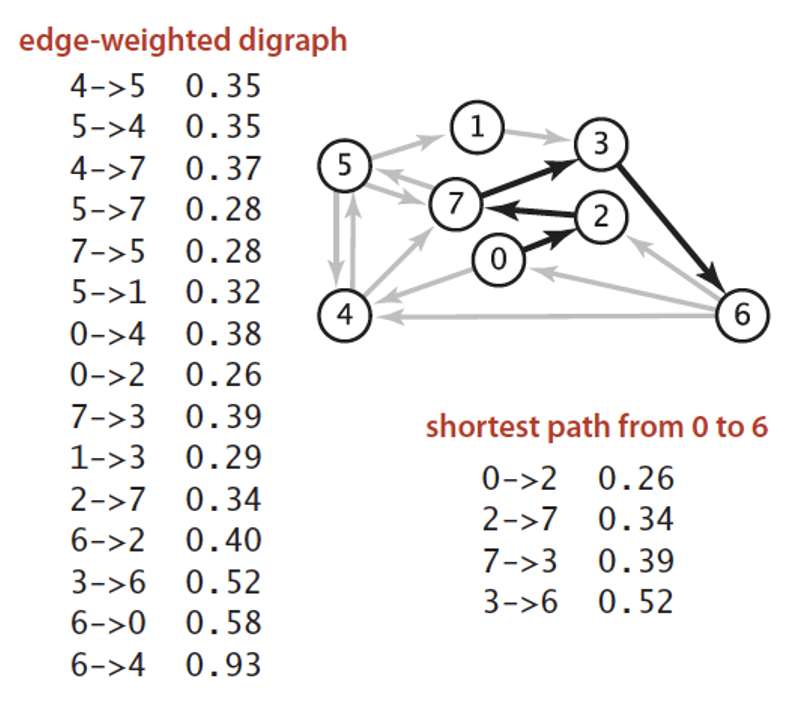

De la misma manera que en el ejercicio anterior, se define el diccionario para guardar el grafo y las estructuras necesarias para manejarlo en el algoritmo.  

In [248]:
grafo_2 = {
    "0" : {"2" : 0.26, "4" : 0.38},
    "1" : {"3": 0.29},
    "2" : {"7": 0.34},
    "3" : {"6": 0.52},
    "4" : {"5": 0.35, "7":0.37},
    "5" : {"1": 0.32, "4": 0.35},
    "6" : {"0": 0.58, "2": 0.40, "4": 0.93},
    "7" : {"3": 0.39 ,"5": 0.28}
}

In [249]:
costs_2 = {
    "0" : float("inf"),
    "1" : 0.32,
    "2" : float("inf"),
    "3" : float("inf"),
    "4" : 0.35,
    "5" : float("inf"),
    "6" : float("inf"),
    "7" : 0.28 
}

parents_2 = {
    "0" : None,
    "1" : "5",
    "2" : None,
    "3" : None,
    "4" : "5",
    "5" : None,
    "6" : None,
    "7" : "5"    
}

processed = []

In [250]:
# Llamada al algoritmo
dijkstra(grafo_2, costs_2, parents_2, processed)
parents_2["5"] = None # para evitar un bucle infinito en la obtención de la ruta

El costo de 3 es más barato desde 7 
 con 0.67
El costo de 5 es más barato desde 7 
 con 0.56
Nodos procesados:  ['7']
El costo de 3 es más barato desde 1 
 con 0.61
Nodos procesados:  ['7', '1']
Nodos procesados:  ['7', '1', '4']
Nodos procesados:  ['7', '1', '4', '5']
El costo de 6 es más barato desde 3 
 con 1.13
Nodos procesados:  ['7', '1', '4', '5', '3']
El costo de 0 es más barato desde 6 
 con 1.71
El costo de 2 es más barato desde 6 
 con 1.5299999999999998
Nodos procesados:  ['7', '1', '4', '5', '3', '6']
Nodos procesados:  ['7', '1', '4', '5', '3', '6', '2']
Nodos procesados:  ['7', '1', '4', '5', '3', '6', '2', '0']
Costos desde el nodo start hasta cada nodo:
[ 0: 1.71
1: 0.32
2: 1.5299999999999998
3: 0.61
4: 0.35
5: 0.56
6: 1.13
7: 0.28
]


In [251]:
# Llamada a la función para imprimir la ruta y el costo
inicio = "5"
fin = "6"
ruta(parents_2, inicio, fin, costs_2)

La ruta más barata desde 5 a 6 es: 5 -> 1 -> 3 -> 6
El costo total es de  1.13


## 4. Conclusiones

El algoritmo de Dijkstra es una herramienta fundamental en la teoría de grafos y se utiliza ampliamente para encontrar las rutas más cortas desde un nodo de origen hasta los demás nodos de un grafo ponderado. A través de su proceso iterativo y eficiente, este algoritmo garantiza la obtención de caminos óptimos siempre que las ponderaciones sean no negativas. Su aplicabilidad en diversas áreas, como redes de transporte, telecomunicaciones y sistemas de navegación, lo convierte en un método versátil y valioso para la resolución de problemas reales y teóricos.

Una de las principales fortalezas del algoritmo es su estructura lógica y su capacidad para actualizar dinámicamente los costos y rutas más cortas en función de las conexiones existentes en el grafo. Sin embargo, es crucial destacar que su eficacia depende de la correcta representación del grafo y la inicialización adecuada de las estructuras auxiliares, como los costos y los padres. Los errores en estas etapas pueden conducir a resultados incorrectos, como la aparición de ciclos.

Finalmente, la exploración teórica del algoritmo permite comprender no solo su funcionamiento interno, sino también su relevancia en la resolución de problemas prácticos. Su estudio fomenta habilidades de análisis algorítmico, optimización, etc, esenciales para el diseño de soluciones eficientes en diversos escenarios. La capacidad de Dijkstra para ofrecer resultados precisos y predecibles lo consolida como fundamental en el campo de los algoritmos de grafos.

## 5. Referencias bibliográficas

[1] Python Software Foundation. (2023). The Python Standard Library. En Python Documentation (versión 3.11). Disponible en https://docs.python.org/3/.

[2] datacamp. (2024). https://www.datacamp.com/es/tutorial/dijkstra-algorithm-in-python

[3] freeCodeCamp.org (2022). https://www.freecodecamp.org/espanol/news/algoritmo-de-la-ruta-mas-corta-de-dijkstra-introduccion-grafica/

## 6. Declaración uso de IA

En la realización de este informe, se utilizó la asistencia de herramientas de inteligencia artificial para la generación de ideas, organización del contenido, y redacción de ciertos apartados, tales como el desarrollo de la introducción y la conclusión. Estas herramientas fueron empleadas para apoyar en la elaboración de texto de manera coherente y estructurada, sin reemplazar la revisión y juicio crítico del autor.